In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from scipy.stats import norm, multinomial

np.random.seed(42)

# Population Scenarios

With the predictive model, changes to the synthetic population will be made to represent scenarios for policy changes and their impact on the dropout rate.

In [2]:
df = pd.read_csv('../data/synpop_feat.csv')
df

,age,sector,nationality,gender,education,year,state,dropped_out,Emp_Age_25_34_Share,Emp_Age_35_49_Share,...,Unemp_No_Vocational_Edu_Share,Unemp_Promotion_Share,Unemp_Rate_Men,Unemp_Rate_Total,Unemp_Rate_Women,Unemp_Total_Count,Unemp_Vocational_Training_Share,Unemp_Women_Share,nominal_wage_index,nominal_wage_growth_rate
0,17-Jährige,Industrie und Handel,Deutsche,weiblich,Ohne Hauptschulabschluss,2013,Baden-Württemberg,0,22.1,39.1,...,44.6,0.2,5.2,5.4,5.7,227794.0,41.3,47.6,84.3,0.7
1,18-Jährige,Industrie und Handel,Deutsche,männlich,Realschul- oder vergleichbarer Abschluss,2013,Baden-Württemberg,0,22.1,39.1,...,44.6,0.2,5.2,5.4,5.7,227794.0,41.3,47.6,84.3,0.7
2,21-Jährige,Industrie und Handel,Deutsche,weiblich,Hochschul- oder Fachhochschulreife,2013,Baden-Württemberg,0,22.1,39.1,...,44.6,0.2,5.2,5.4,5.7,227794.0,41.3,47.6,84.3,0.7
3,23-Jährige,Handwerk,Deutsche,weiblich,Realschul- oder vergleichbarer Abschluss,2013,Baden-Württemberg,0,22.1,39.1,...,44.6,0.2,5.2,5.4,5.7,227794.0,41.3,47.6,84.3,0.7
4,17-Jährige,Industrie und Handel,Deutsche,männlich,Realschul- oder vergleichbarer Abschluss,2013,Baden-Württemberg,0,22.1,39.1,...,44.6,0.2,5.2,5.4,5.7,227794.0,41.3,47.6,84.3,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351995,19-Jährige,Industrie und Handel,Deutsche,männlich,Hochschul- oder Fachhochschulreife,2023,Thüringen,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.6,6.6
351996,20-Jährige,Industrie und Handel,Deutsche,männlich,Realschul- oder vergleichbarer Abschluss,2023,Thüringen,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.6,6.6
351997,21-Jährige,Handwerk,Deutsche,weiblich,Hauptschulabschluss,2023,Thüringen,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.6,6.6
351998,21-Jährige,Industrie und Handel,Deutsche,männlich,Im Ausland erworbener Abschluss (nicht zuorden...,2023,Thüringen,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.6,6.6


In [29]:
print(df.columns)

Index(['age', 'sector', 'nationality', 'gender', 'education', 'year', 'state',
       'dropped_out', 'Emp_Age_25_34_Share', 'Emp_Age_35_49_Share',
       'Emp_Age_50_Plus_Share', 'Emp_Age_Under_25_Share', 'Emp_Bachelor_Share',
       'Emp_Diplom_Magister_StateExam_Share', 'Emp_Foreign_Share', 'Emp_Index',
       'Emp_Master_Tech_Share', 'Emp_No_Vocational_Edu_Share',
       'Emp_PartTime_Share', 'Emp_Promotion_Share',
       'Emp_Recognized_Vocational_Edu_Share', 'Emp_Sector_Agriculture_Share',
       'Emp_Sector_Construction_Share',
       'Emp_Sector_Manufacturing_Machinery_Share',
       'Emp_Sector_Manufacturing_Other_Share',
       'Emp_Sector_Manufacturing_Share',
       'Emp_Sector_Services_Edu_Culture_Share',
       'Emp_Sector_Services_Finance_Insurance_Share',
       'Emp_Sector_Services_Health_Social_Share',
       'Emp_Sector_Services_Other_Share',
       'Emp_Sector_Services_Public_Admin_Share', 'Emp_Sector_Services_Share',
       'Emp_Sector_Services_Trade_Share',
       

In [3]:
numerical_cols = ['Emp_Age_25_34_Share', 'Emp_Age_35_49_Share',
       'Emp_Age_50_Plus_Share', 'Emp_Age_Under_25_Share', 'Emp_Bachelor_Share',
       'Emp_Diplom_Magister_StateExam_Share', 'Emp_Foreign_Share', 'Emp_Index',
       'Emp_Master_Tech_Share', 'Emp_No_Vocational_Edu_Share',
       'Emp_PartTime_Share', 'Emp_Promotion_Share',
       'Emp_Recognized_Vocational_Edu_Share', 'Emp_Sector_Agriculture_Share',
       'Emp_Sector_Construction_Share',
       'Emp_Sector_Manufacturing_Machinery_Share',
       'Emp_Sector_Manufacturing_Other_Share',
       'Emp_Sector_Manufacturing_Share',
       'Emp_Sector_Services_Edu_Culture_Share',
       'Emp_Sector_Services_Finance_Insurance_Share',
       'Emp_Sector_Services_Health_Social_Share',
       'Emp_Sector_Services_Other_Share',
       'Emp_Sector_Services_Public_Admin_Share', 'Emp_Sector_Services_Share',
       'Emp_Sector_Services_Trade_Share',
       'Emp_Sector_Services_Transport_Com_Share', 'Emp_Total_Count',
       'Emp_Vocational_Edu_Unknown_Share', 'Emp_Women_Share',
       'Unemp_Age_25_34_Share', 'Unemp_Age_35_49_Share',
       'Unemp_Age_50_Plus_Share', 'Unemp_Age_Under_25_Share',
       'Unemp_Bachelor_Share', 'Unemp_Diplom_Magister_Master_StateExam_Share',
       'Unemp_Edu_Unknown_Share', 'Unemp_Foreign_Share',
       'Unemp_Index_2013_100', 'Unemp_LongTerm_Share',
       'Unemp_No_Vocational_Edu_Share', 'Unemp_Promotion_Share',
       'Unemp_Rate_Men', 'Unemp_Rate_Total', 'Unemp_Rate_Women',
       'Unemp_Total_Count', 'Unemp_Vocational_Training_Share',
       'Unemp_Women_Share', 'nominal_wage_index', 'nominal_wage_growth_rate']

categorical_cols = ['age', 'sector', 'nationality', 'gender', 'education']

df['year_numeric'] = df['year']

In [4]:
df = df[df['year'] != 2023].copy()


--- NaN Inspection: Counts of NaNs in specified columns ---
Column 'nominal_wage_index': 60000 NaNs
Column 'nominal_wage_growth_rate': 20000 NaNs

--- NaN Inspection: Breakdown by Year and State ---

NaNs in 'nominal_wage_index' by year and state:
state  Mecklenburg-Vorpommern  Sachsen-Anhalt  Schleswig-Holstein
year                                                             
2013                     2000            2000                2000
2014                     2000            2000                2000
2015                     2000            2000                2000
2016                     2000            2000                2000
2017                     2000            2000                2000
2018                     2000            2000                2000
2019                     2000            2000                2000
2020                     2000            2000                2000
2021                     2000            2000                2000
2022                     

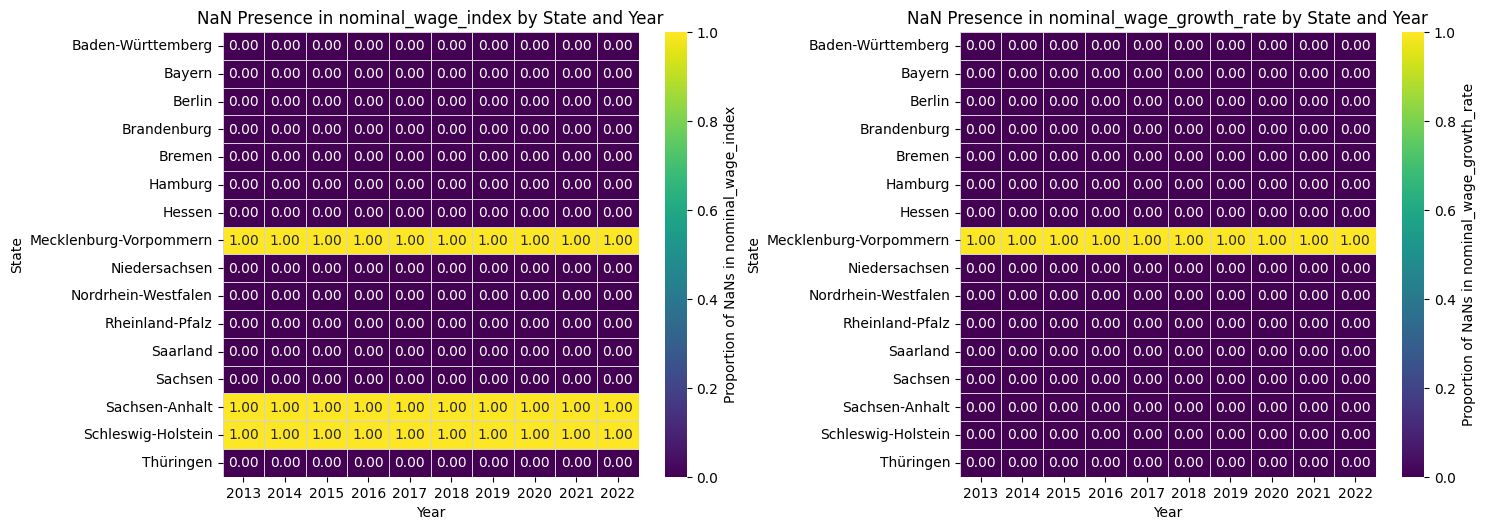


--- Overall NaN Presence Heatmap (selected columns) ---


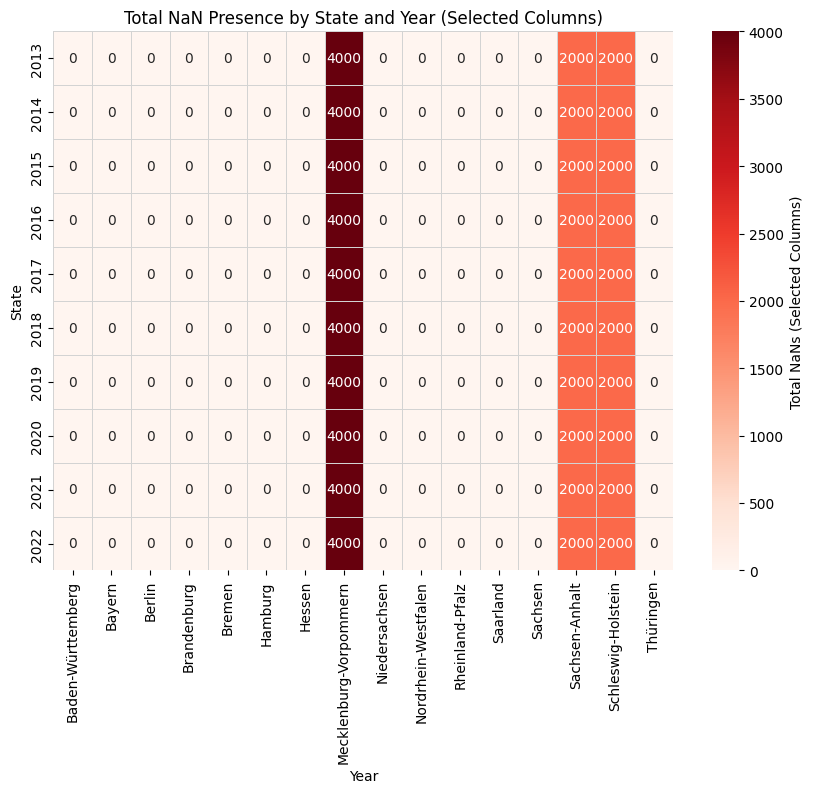

In [32]:
# --- NaN Inspection ---

print("\n--- NaN Inspection: Counts of NaNs in specified columns ---")
nan_columns = ['nominal_wage_index', 'nominal_wage_growth_rate']
for col in nan_columns:
    print(f"Column '{col}': {df[col].isna().sum()} NaNs")

print("\n--- NaN Inspection: Breakdown by Year and State ---")
for col in nan_columns:
    print(f"\nNaNs in '{col}' by year and state:")
    # Group by year and state, count NaNs
    nan_counts = df[df[col].isna()].groupby(['year', 'state']).size().unstack(fill_value=0)
    if nan_counts.empty:
        print(f"  No NaNs found for column '{col}'.")
    else:
        print(nan_counts)

# --- Heatmap Visualization ---

print("\n--- Heatmap Visualization of NaNs ---")

# Create a boolean DataFrame indicating NaNs
# We'll select the relevant columns and pivot for the heatmap
# For this heatmap, let's focus on the specified columns and overall NaN presence
# by year and state.

# Columns of interest for the heatmap
cols_for_heatmap = ['nominal_wage_index', 'nominal_wage_growth_rate']

# Create a DataFrame indicating True for NaN, False otherwise
nan_df = df[cols_for_heatmap].isna()

# Group by 'year' and 'state' and calculate the mean of NaNs (0 for False, 1 for True)
# This will give the proportion of NaNs for each combination, or 1 if all are NaN
nan_proportion_by_year_state = df.groupby(['year', 'state'])[cols_for_heatmap].apply(lambda x: x.isna().mean()).reset_index()

# Now, let's create a heatmap for each of the specific columns
plt.figure(figsize=(15, 10))

for i, col in enumerate(cols_for_heatmap):
    plt.subplot(2, 2, i + 1) # Adjust subplot grid based on number of columns
    pivot_table = nan_proportion_by_year_state.pivot(index='state', columns='year', values=col)

    sns.heatmap(pivot_table, cmap='viridis', cbar_kws={'label': f'Proportion of NaNs in {col}'}, linewidths=.5, linecolor='lightgray', annot=True, fmt=".2f")
    plt.title(f'NaN Presence in {col} by State and Year')
    plt.xlabel('Year')
    plt.ylabel('State')

plt.tight_layout()
plt.show()

# Alternative heatmap: showing total NaNs per year/state across *all* columns or a selection
print("\n--- Overall NaN Presence Heatmap (selected columns) ---")
# Count total NaNs for the selected columns per year-state group
total_nan_counts_per_group = df.groupby(['year', 'state'])[cols_for_heatmap].apply(lambda x: x.isna().sum().sum()).unstack(fill_value=0)

plt.figure(figsize=(10, 7))
sns.heatmap(total_nan_counts_per_group, cmap='Reds', cbar_kws={'label': 'Total NaNs (Selected Columns)'}, linewidths=.5, linecolor='lightgray', annot=True, fmt="d")
plt.title('Total NaN Presence by State and Year (Selected Columns)')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

***
# Visualisation

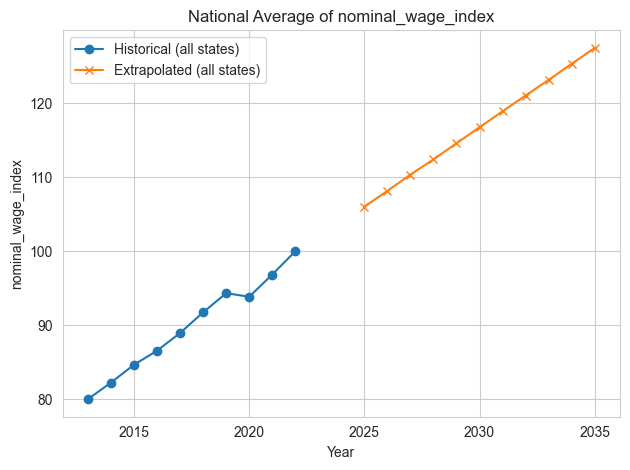

In [ ]:
feature = 'nominal_wage_index'


# Historical national average
hist = historical_df.groupby('year_numeric')[feature].mean()

# Extrapolated national average
fut = BAU_10y.groupby('year_numeric')[feature].mean()

# Plot
plt.plot(hist.index, hist.values, label='Historical (all states)', marker='o')
plt.plot(fut.index, fut.values, label='Extrapolated (all states)', marker='x')
plt.title(f"National Average of {feature}")
plt.xlabel("Year")
plt.ylabel(feature)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

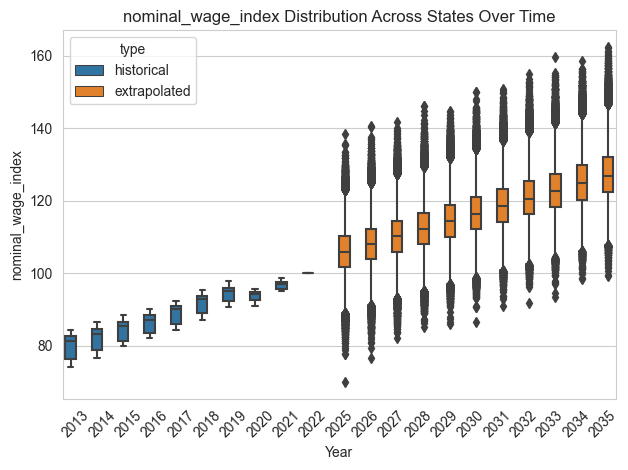

In [ ]:
df = pd.concat([historical_df, BAU_10y])
df['type'] = df['year_numeric'].apply(lambda x: 'historical' if x < 2023 else 'extrapolated')

sns.boxplot(data=df, x='year_numeric', y=feature, hue='type')
plt.title(f"{feature} Distribution Across States Over Time")
plt.xlabel("Year")
plt.ylabel(feature)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***
# Scenario Analysis

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from sklearn.preprocessing import OrdinalEncoder
import mlflow
import xgboost # Ensure xgboost is imported if model is xgboost


class ScenarioAnalysis:
    """
    A class to perform comprehensive scenario analysis, including data loading,
    extrapolation, synthetic population generation, and prediction using an ML model.
    """

    def __init__(self, data_path, model_path, numerical_cols, categorical_cols):
        """
        Initializes the ScenarioAnalysis with data and model paths, and column definitions.

        Args:
            data_path (str): Path to the historical data CSV file.
            model_path (str): Path to the MLflow model.
            numerical_cols (list): List of column names considered numerical features.
            categorical_cols (list): List of column names considered categorical features.
        """
        self.data_path = data_path
        self.model_path = model_path
        self.numerical_cols = numerical_cols
        self.categorical_cols = categorical_cols

        self.df_original = self._load_data()
        self.historical_df = self.df_original[self.df_original['year'] != 2023].copy()
        self.numerical_models = self._get_numerical_extrapolation_models()
        self.categorical_models = self._get_categorical_extrapolation_models()

        # Initialize and fit the OrdinalEncoder on the historical data for consistent encoding
        self.categorical_cols_to_encode = [
            'education', 'state', 'gender', 'sector', 'nationality', 'age'
        ] # These should align with what your ML model expects to be encoded
        self.feature_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        self._fit_encoder_on_historical_data()

        # Define the exact columns the ML model expects for prediction
        # This list should perfectly match the feature set used during model training
        self.all_expected_model_columns = [
            "age", "education", "year", "state", "gender", "sector", "nationality",
            "Emp_Age_25_34_Share", "Emp_Age_35_49_Share", "Emp_Age_50_Plus_Share",
            "Emp_Age_Under_25_Share", "Emp_Bachelor_Share", "Emp_Diplom_Magister_StateExam_Share",
            "Emp_Foreign_Share", "Emp_Index", "Emp_Master_Tech_Share",
            "Emp_No_Vocational_Edu_Share", "Emp_PartTime_Share", "Emp_Promotion_Share",
            "Emp_Recognized_Vocational_Edu_Share", "Emp_Sector_Agriculture_Share",
            "Emp_Sector_Construction_Share", "Emp_Sector_Manufacturing_Machinery_Share",
            "Emp_Sector_Manufacturing_Other_Share", "Emp_Sector_Manufacturing_Share",
            "Emp_Sector_Services_Edu_Culture_Share",
            "Emp_Sector_Services_Finance_Insurance_Share", "Emp_Sector_Services_Health_Social_Share",
            "Emp_Sector_Services_Other_Share", "Emp_Sector_Services_Public_Admin_Share", "Emp_Sector_Services_Share",
            "Emp_Sector_Services_Trade_Share", "Emp_Sector_Services_Transport_Com_Share", "Emp_Total_Count",
            "Emp_Vocational_Edu_Unknown_Share", "Emp_Women_Share", "Unemp_Age_25_34_Share", "Unemp_Age_35_49_Share",
            "Unemp_Age_50_Plus_Share", "Unemp_Age_Under_25_Share", "Unemp_Bachelor_Share",
            "Unemp_Diplom_Magister_Master_StateExam_Share", "Unemp_Edu_Unknown_Share", "Unemp_Foreign_Share",
            "Unemp_Index_2013_100", "Unemp_LongTerm_Share", "Unemp_No_Vocational_Edu_Share",
            "Unemp_Promotion_Share", "Unemp_Rate_Men", "Unemp_Rate_Total", "Unemp_Rate_Women",
            "Unemp_Total_Count", "Unemp_Vocational_Training_Share", "Unemp_Women_Share",
            "nominal_wage_index", "nominal_wage_growth_rate"
        ]

    def _load_data(self):
        """Loads data from the specified CSV path."""
        df = pd.read_csv(self.data_path)
        df['year_numeric'] = df['year']
        return df

    def _fit_encoder_on_historical_data(self):
        """Fits the OrdinalEncoder on the historical categorical data."""
        # Ensure that all categories that might appear in historical_df for these columns
        # are seen by the encoder. This is crucial for consistent encoding.
        data_to_fit = self.historical_df[self.categorical_cols_to_encode].copy()
        self.feature_encoder.fit(data_to_fit)

    def _get_numerical_extrapolation_models(self):
        """
        Trains linear regression models for numerical features for each state
        and provides a national fallback.
        """
        models = {}
        all_states = self.historical_df['state'].unique()
        national_models = {}

        # First, train national models for fallback
        for col in self.numerical_cols:
            nat_avg = self.historical_df.groupby('year_numeric')[col].mean().reset_index().dropna(subset=[col])
            if len(nat_avg) >= 2:
                Xn, yn = nat_avg[['year_numeric']], nat_avg[col]
                nat_model = LinearRegression().fit(Xn, yn)
                national_models[col] = lambda yr, m=nat_model: m.predict(pd.DataFrame([[yr]], columns=['year_numeric']))[0]
            elif not nat_avg.empty:
                last_val = nat_avg[col].iloc[-1]
                national_models[col] = lambda yr, val=last_val: val
            else:
                national_models[col] = lambda yr: np.nan

        # Then, train state-specific models, falling back to national if insufficient data
        for state in all_states:
            models[state] = {}
            state_df = self.historical_df[self.historical_df['state'] == state]
            for col in self.numerical_cols:
                yearly_avg = state_df.groupby('year_numeric')[col].mean().reset_index().dropna(subset=[col])
                if len(yearly_avg) >= 2:
                    X, y = yearly_avg[['year_numeric']], yearly_avg[col]
                    model = LinearRegression().fit(X, y)
                    models[state][col] = lambda yr, m=model: m.predict(pd.DataFrame([[yr]], columns=['year_numeric']))[0]
                else:
                    # Use national fallback if state data is insufficient
                    models[state][col] = national_models[col]
        return models

    def _get_categorical_extrapolation_models(self):
        """
        Calculates yearly proportions for categorical features for each state.
        """
        models = {}
        all_states = self.historical_df['state'].unique()
        for state in all_states:
            models[state] = {}
            state_df = self.historical_df[self.historical_df['state'] == state]
            for col in self.categorical_cols:
                yearly_counts = state_df.dropna(subset=[col]).groupby(['year_numeric', col]).size().unstack(fill_value=0)
                if yearly_counts.empty:
                    models[state][col] = {}
                    continue
                yearly_props = yearly_counts.div(yearly_counts.sum(axis=1), axis=0)
                cats = yearly_props.columns
                cat_models = {}
                for cat in cats:
                    cat_props = yearly_props[[cat]].reset_index()
                    if len(cat_props) >= 2:
                        X, y = cat_props[['year_numeric']], cat_props[cat]
                        model = LinearRegression().fit(X, y)
                        cat_models[cat] = lambda yr, m=model: np.clip(m.predict(pd.DataFrame([[yr]], columns=['year_numeric']))[0], 0.0, 1.0)
                    elif not cat_props.empty:
                        last_prop = cat_props[cat].iloc[-1]
                        cat_models[cat] = lambda yr, prop=last_prop: prop
                    else:
                        cat_models[cat] = lambda yr: 0.0

                def get_props_closure(year, cat_models=cat_models, all_cats=cats):
                    props = {cat: cat_models.get(cat, lambda x: 0.0)(year) for cat in all_cats}
                    total = sum(props.values())
                    if total > 0:
                        return {cat: prop / total for cat, prop in props.items()}
                    else:
                        # Fallback to overall historical proportions if no state-specific props or all zero
                        overall_props = self.historical_df[col].value_counts(normalize=True).to_dict()
                        if overall_props:
                            return {k: v / sum(overall_props.values()) for k, v in overall_props.items()}
                        return {cat: 1.0 / len(all_cats) for cat in all_cats} if len(all_cats) > 0 else {}

                models[state][col] = get_props_closure
        return models

    def generate_single_year_population(
        self, target_year, num_individuals_per_state=None,
        scenario_manipulations=None, target_states_to_generate=None
    ):
        """
        Generates a synthetic population for a single target year.

        Args:
            target_year (int): The year for which to generate the population.
            num_individuals_per_state (int, optional): Number of individuals to generate per state.
                                                        If None, uses historical last year's count.
            scenario_manipulations (dict, optional): A dictionary of manipulations to apply to features.
                                                     E.g., {'feature_name': {'StateA': value, 'All': value}}
            target_states_to_generate (list, optional): List of states to generate population for.
                                                         If None, generates for all states.

        Returns:
            pd.DataFrame: A DataFrame representing the synthetic population for the target year.
        """
        synthetic_population_list = []
        states_to_process = target_states_to_generate or list(self.numerical_models.keys())
        states_to_process = [s for s in states_to_process if s in self.numerical_models]

        for state in states_to_process:
            state_hist = self.df_original[(self.df_original['state'] == state) & (self.df_original['year'] != 2023)]
            if num_individuals_per_state is None:
                last_year = state_hist['year'].max() if not state_hist.empty else None
                n = state_hist[state_hist['year'] == last_year].shape[0] if last_year is not None else 5000 # Default if no history
            else:
                n = num_individuals_per_state

            state_data = {}
            for col in self.numerical_cols:
                mean = self.numerical_models[state][col](target_year)
                if scenario_manipulations and col in scenario_manipulations:
                    if state in scenario_manipulations[col]:
                        mean = scenario_manipulations[col][state]
                    elif 'All' in scenario_manipulations[col]:
                        mean = scenario_manipulations[col]['All']

                std = state_hist[col].dropna().std() if not state_hist.empty else np.nan
                if pd.isna(std) or std == 0:
                    # Fallback to national std if state std is missing or zero
                    std = self.historical_df[col].dropna().std()
                    if pd.isna(std) or std == 0:
                        std = 0.01 # Small epsilon to ensure some variance

                samples = norm.rvs(loc=mean, scale=std, size=n)
                if '_Share' in col or '_Rate' in col or 'growth_rate' in col:
                    samples = np.clip(samples, 0, 100) # Assuming percentage shares/rates
                if 'Count' in col:
                    samples = np.clip(samples, 0, np.inf) # Counts should not be negative
                state_data[col] = samples

            for col in self.categorical_cols:
                props = self.categorical_models[state][col](target_year)
                if scenario_manipulations and col in scenario_manipulations:
                    if state in scenario_manipulations[col] and isinstance(scenario_manipulations[col][state], dict):
                        props = scenario_manipulations[col][state]
                    elif 'All' in scenario_manipulations[col] and isinstance(scenario_manipulations[col]['All'], dict):
                        props = scenario_manipulations[col]['All']
                
                # Ensure props is not empty and has valid probabilities
                if not props:
                    # Fallback to overall historical proportions if no state-specific props or manipulations
                    overall_props = self.historical_df[col].value_counts(normalize=True).to_dict()
                    props = overall_props if overall_props else {}

                cats = list(props.keys())
                probs = list(props.values())

                if not cats:
                    state_data[col] = [None] * n # Handle case with no categories
                    continue

                prob_sum = sum(probs)
                if prob_sum == 0:
                    probs = [1.0 / len(cats)] * len(cats) # Distribute evenly if all probs are zero
                else:
                    probs = [p / prob_sum for p in probs] # Normalize probabilities

                state_data[col] = np.random.choice(cats, size=n, p=probs)

            state_df = pd.DataFrame(state_data)
            state_df['state'] = state
            state_df['year'] = target_year
            state_df['year_numeric'] = target_year # Keep for consistency, though 'year' is often sufficient
            synthetic_population_list.append(state_df)

        return pd.concat(synthetic_population_list, ignore_index=True)

    def generate_scenario_populations(
        self, start_year, end_year, num_individuals_per_state=None,
        scenario_manipulations_over_time=None, target_states_to_generate=None
    ):
        """
        Generates synthetic populations for a range of years under a given scenario.

        Args:
            start_year (int): The starting year for population generation.
            end_year (int): The ending year for population generation.
            num_individuals_per_state (int, optional): Number of individuals to generate per state per year.
            scenario_manipulations_over_time (dict, optional): A dictionary where keys are years
                                                               and values are manipulation dictionaries.
            target_states_to_generate (list, optional): List of states to generate population for.

        Returns:
            pd.DataFrame: A DataFrame containing the synthetic population for all years in the range.
        """
        if scenario_manipulations_over_time is None:
            scenario_manipulations_over_time = {}

        all_scenario_populations = []
        for year in range(start_year, end_year + 1):
            manip = scenario_manipulations_over_time.get(year, {})
            yearly_df = self.generate_single_year_population(
                target_year=year,
                num_individuals_per_state=num_individuals_per_state,
                scenario_manipulations=manip,
                target_states_to_generate=target_states_to_generate
            )
            all_scenario_populations.append(yearly_df)
        return pd.concat(all_scenario_populations, ignore_index=True)

    def _encode_categorical_columns(self, df):
        """
        Encodes specified categorical columns in a DataFrame using the pre-fitted encoder.

        Args:
            df (pd.DataFrame): The DataFrame to encode.

        Returns:
            pd.DataFrame: A copy of the DataFrame with specified categorical columns encoded.
        """
        df_copy = df.copy()
        # Ensure that columns to encode actually exist in the dataframe before attempting to transform
        cols_to_transform = [col for col in self.categorical_cols_to_encode if col in df_copy.columns]
        if cols_to_transform:
            df_copy[cols_to_transform] = self.feature_encoder.transform(df_copy[cols_to_transform])
        return df_copy

    def run_prediction_and_analysis(self, scenario_df):
        """
        Loads the ML model, makes predictions on the scenario DataFrame, and analyzes results.

        Args:
            scenario_df (pd.DataFrame): The DataFrame containing the synthetic population
                                        for which to make predictions.

        Returns:
            pd.DataFrame: A DataFrame summarizing the yearly prediction ratios.
        """
        print(f"Loading ML model from: {self.model_path}")
        model = mlflow.xgboost.load_model(self.model_path)
        print("ML model loaded successfully.")

        # Encode categorical columns in the scenario DataFrame
        scenario_df_encoded = self._encode_categorical_columns(scenario_df.copy())

        # Ensure the columns are in the exact order expected by the model
        # Fill missing columns with 0 or appropriate default if the model was trained with more features
        # (though ideally, the generated data should cover all expected features)
        missing_cols = set(self.all_expected_model_columns) - set(scenario_df_encoded.columns)
        for col in missing_cols:
            scenario_df_encoded[col] = 0  # Or pd.NA, depending on feature type and model handling

        scenario_df_final = scenario_df_encoded[self.all_expected_model_columns]

        print(f"Making predictions on {len(scenario_df_final)} rows...")
        predictions = model.predict(scenario_df_final)
        print("Predictions completed.")

        results_df = pd.DataFrame({
            'year': scenario_df_final['year'],
            'prediction': predictions
        })

        # Group by 'year' and calculate statistics for each group
        yearly_ratios = {}
        for year, group in results_df.groupby('year'):
            count_zeros = np.sum(group['prediction'] == 0)
            count_ones = np.sum(group['prediction'] == 1)
            total_for_year = len(group)

            if total_for_year > 0:
                proportion_zeros = count_zeros / total_for_year
                proportion_ones = count_ones / total_for_year

                yearly_ratios[year] = {
                    'total': total_for_year,
                    'zeros': count_zeros,
                    'ones': count_ones,
                    'proportion_zeros': proportion_zeros,
                    'proportion_ones': proportion_ones,
                    'ratio_0_to_1': count_zeros / count_ones if count_ones > 0 else np.inf
                }
            else:
                yearly_ratios[year] = {
                    'total': 0, 'zeros': 0, 'ones': 0,
                    'proportion_zeros': np.nan, 'proportion_ones': np.nan, 'ratio_0_to_1': np.nan
                }

        yearly_ratios_df = pd.DataFrame.from_dict(yearly_ratios, orient='index')
        yearly_ratios_df.index.name = 'year'
        return yearly_ratios_df

    def _generate_education_manipulations(self, shift_amount, shift_direction, start_year, end_year, scope):
        """
        Generates year-specific categorical manipulations for 'education' based on a shift.
        Shift is interpreted as a total percentage point change over the scenario duration.
        Bachelor gains/loses, and No Vocational Education loses/gains, with intermediate
        categories adjusting proportionally to maintain sum to 1.

        Args:
            shift_amount (float): Total percentage points of shift (e.g., 0.01 for 1 percentage point).
            shift_direction (str): 'increase' (towards Bachelor) or 'decrease' (towards No Vocational Education).
            start_year (int): Start year of the scenario.
            end_year (int): End year of the scenario.
            scope (str or list): 'All' or a list of specific states.

        Returns:
            dict: Scenario manipulations for 'education' over time.
        """
        education_manipulations = {}
        duration = end_year - start_year + 1
        if duration == 0: duration = 1 # Avoid division by zero for single year scenarios

        # These are the categories assumed for education in the model based on example
        EDUCATION_CATEGORIES = ['Ohne Hauptschulabschluss', 'Hauptschulabschluss', 'Realschul- oder vergleichbarer Abschluss', 'Hochschul- oder Fachhochschulreife']
        TARGET_HIGH_EDU = 'Realschul- oder vergleichbarer Abschluss'
        TARGET_LOW_EDU = 'Hauptschulabschluss'
        # Determine the effective scopes (e.g., ['All'] or ['Hamburg'])
        actual_scopes = [scope] if isinstance(scope, str) else scope

        # Pre-calculate base proportions for all necessary scopes for efficiency
        base_proportions_cache = {}
        for current_scope in actual_scopes:
            if current_scope == 'All':
                # Generate a small sample for 'All' to get the overall baseline proportions
                temp_df = self.generate_single_year_population(
                    target_year=start_year, num_individuals_per_state=100, # Small sample size for baseline
                    scenario_manipulations=None, target_states_to_generate=None
                )
                base_proportions_cache[current_scope] = temp_df['education'].value_counts(normalize=True).to_dict()
            else:
                # Generate a small sample for the specific state to get its baseline
                temp_state_df = self.generate_single_year_population(
                    target_year=start_year, num_individuals_per_state=100, # Small sample size for baseline
                    scenario_manipulations=None, target_states_to_generate=[current_scope]
                )
                base_proportions_cache[current_scope] = temp_state_df['education'].value_counts(normalize=True).to_dict()
            
            # Ensure all EDUCATION_CATEGORIES are in base_props for consistency, even if 0
            for cat in EDUCATION_CATEGORIES:
                base_proportions_cache[current_scope].setdefault(cat, 0.0)

        for year in range(start_year, end_year + 1):
            year_manipulations_for_feature = {}
            # Progress factor: 0.0 at start_year, 1.0 at end_year
            # This makes the shift cumulative over the duration
            progress_factor = (year - start_year) / (duration - 1) if duration > 1 else 0.0

            for current_scope in actual_scopes:
                base_props = base_proportions_cache[current_scope]
                current_props = base_props.copy() # Start from baseline for each year's calculation

                # Calculate the cumulative shift for this year
                cumulative_shift_points = shift_amount * progress_factor

                # Apply changes to target high/low education categories
                if shift_direction == 'increase':
                    # Bachelor gains, No Vocational Education loses
                    current_props[TARGET_HIGH_EDU] += cumulative_shift_points
                    current_props[TARGET_LOW_EDU] -= cumulative_shift_points
                elif shift_direction == 'decrease':
                    # Bachelor loses, No Vocational Education gains
                    current_props[TARGET_HIGH_EDU] -= cumulative_shift_points
                    current_props[TARGET_LOW_EDU] += cumulative_shift_points
                
                # Ensure proportions are within [0, 1] range after direct shifts
                for cat in EDUCATION_CATEGORIES:
                    current_props[cat] = np.clip(current_props.get(cat, 0.0), 0.0, 1.0)
                
                # Normalize all categories to sum to 1.0, distributing adjustments proportionally
                total_sum = sum(current_props.values())
                if total_sum > 0:
                    normalized_props = {cat: prop / total_sum for cat, prop in current_props.items()}
                else: # Fallback if all values became zero (unlikely with clip(0,1))
                    normalized_props = {cat: 1.0 / len(EDUCATION_CATEGORIES) for cat in EDUCATION_CATEGORIES}

                year_manipulations_for_feature[current_scope] = normalized_props
            
            education_manipulations.setdefault(year, {})['education'] = year_manipulations_for_feature
        return education_manipulations


# --- Scenario Builder Utilities (can remain standalone or be methods of a ScenarioBuilder class) ---

def build_numerical_growth_scenario(feature_name, start_value=None, annual_increase=None,
                                    start_year=2025, end_year=2035, scope='All', base_extrapolated_value=None):
    """
    Builds a scenario dictionary for numerical feature growth over time.

    Args:
        feature_name (str): The name of the numerical feature to manipulate.
        start_value (float, optional): The fixed target value for the feature.
        annual_increase (float, optional): Annual increment to the base_extrapolated_value.
        start_year (int): The starting year for the scenario.
        end_year (int): The ending year for the scenario.
        scope (str or list): 'All' for all states, or a string for a single state, or a list of specific states.
        base_extrapolated_value (float, optional): The base value at start_year to apply annual_increase from.

    Returns:
        dict: A dictionary representing the numerical growth scenario.
    """
    scenario = {}
    for year in range(start_year, end_year + 1):
        target_value = start_value
        if target_value is None:
            if base_extrapolated_value is not None and annual_increase is not None:
                target_value = base_extrapolated_value + (year - start_year) * annual_increase
            else:
                raise ValueError("Either start_value or (base_extrapolated_value and annual_increase) must be provided.")
        
        manipulation = {}
        if scope == 'All':
            manipulation['All'] = target_value
        elif isinstance(scope, str): # NEW: Handle single string state names
            manipulation[scope] = target_value
        elif isinstance(scope, list):
            for state in scope:
                manipulation[state] = target_value
        else:
            raise ValueError("Scope must be 'All', a string for a single state, or a list of states.")
        
        # Ensure the nested dictionary structure is correctly initialized
        scenario.setdefault(year, {}).setdefault(feature_name, {}).update(manipulation)
    return scenario


def build_categorical_shift_scenario(feature_name, target_proportions_by_year,
                                     start_year=2025, end_year=2035, scope='All'):
    """
    Builds a scenario dictionary for categorical feature shifts over time.

    Args:
        feature_name (str): The name of the categorical feature to manipulate.
        target_proportions_by_year (dict): A dictionary where keys are years and values are
                                           dictionaries of category: proportion pairs.
                                           Can also be a single dictionary if proportions are static.
        start_year (int): The starting year for the scenario.
        end_year (int): The ending year for the scenario.
        scope (str or list): 'All' for all states, or a list of specific states.

    Returns:
        dict: A dictionary representing the categorical shift scenario.
    """
    scenario = {}
    for year in range(start_year, end_year + 1):
        current_proportions = None
        if isinstance(target_proportions_by_year, dict):
            # Check if it's a fixed proportion for all years or year-specific
            if not any(isinstance(v, dict) for v in target_proportions_by_year.values()):
                current_proportions = target_proportions_by_year # Fixed for all years
            elif year in target_proportions_by_year:
                current_proportions = target_proportions_by_year[year] # Year-specific
        
        if current_proportions is None:
            continue # No specific proportions for this year

        total_prop = sum(current_proportions.values())
        if total_prop == 0:
            # Handle case where all proportions are zero, perhaps distribute evenly or skip
            normalized_proportions = {k: 1.0 / len(current_proportions) for k in current_proportions.keys()} if current_proportions else {}
        else:
            normalized_proportions = {k: v / total_prop for k, v in current_proportions.items()}
        
        if not normalized_proportions:
            continue # Skip if no categories to normalize

        manipulation = {}
        if scope == 'All':
            manipulation['All'] = normalized_proportions
        elif isinstance(scope, list):
            for state in scope:
                manipulation[state] = normalized_proportions
        else:
            raise ValueError("Scope must be 'All' or a list of states.")
        
        scenario.setdefault(year, {}).setdefault(feature_name, {}).update(manipulation)
    return scenario


def combine_scenarios(*scenario_parts):
    """
    Combines multiple scenario dictionaries into a single, comprehensive scenario.

    Args:
        *scenario_parts: Variable number of scenario dictionaries to combine.

    Returns:
        dict: A combined scenario dictionary.
    """
    combined = {}
    for part in scenario_parts:
        if not isinstance(part, dict):
            print(f"Warning: Skipping non-dictionary scenario part: {type(part)}")
            continue
        for year, features in part.items():
            if not isinstance(features, dict):
                print(f"Warning: Skipping non-dictionary features for year {year}: {type(features)}")
                continue
            for feature_name, manipulations in features.items():
                combined.setdefault(year, {}).setdefault(feature_name, {}).update(manipulations)
    return combined


# --- Example Usage ---

if __name__ == '__main__':
    # Define your column lists
    numerical_cols = [
        'Emp_Age_25_34_Share', 'Emp_Age_35_49_Share', 'Emp_Age_50_Plus_Share', 'Emp_Age_Under_25_Share',
        'Emp_Bachelor_Share', 'Emp_Diplom_Magister_StateExam_Share', 'Emp_Foreign_Share', 'Emp_Index',
        'Emp_Master_Tech_Share', 'Emp_No_Vocational_Edu_Share', 'Emp_PartTime_Share', 'Emp_Promotion_Share',
        'Emp_Recognized_Vocational_Edu_Share', 'Emp_Sector_Agriculture_Share', 'Emp_Sector_Construction_Share',
        'Emp_Sector_Manufacturing_Machinery_Share', 'Emp_Sector_Manufacturing_Other_Share',
        'Emp_Sector_Manufacturing_Share', 'Emp_Sector_Services_Edu_Culture_Share',
        'Emp_Sector_Services_Finance_Insurance_Share', 'Emp_Sector_Services_Health_Social_Share',
        'Emp_Sector_Services_Other_Share', 'Emp_Sector_Services_Public_Admin_Share', 'Emp_Sector_Services_Share',
        'Emp_Sector_Services_Trade_Share', 'Emp_Sector_Services_Transport_Com_Share', 'Emp_Total_Count',
        'Emp_Vocational_Edu_Unknown_Share', 'Emp_Women_Share', 'Unemp_Age_25_34_Share', 'Unemp_Age_35_49_Share',
        'Unemp_Age_50_Plus_Share', 'Unemp_Age_Under_25_Share', 'Unemp_Bachelor_Share',
        'Unemp_Diplom_Magister_Master_StateExam_Share', 'Unemp_Edu_Unknown_Share', 'Unemp_Foreign_Share',
        'Unemp_Index_2013_100', 'Unemp_LongTerm_Share', 'Unemp_No_Vocational_Edu_Share',
        'Unemp_Promotion_Share', 'Unemp_Rate_Men', 'Unemp_Rate_Total', 'Unemp_Rate_Women',
        'Unemp_Total_Count', 'Unemp_Vocational_Training_Share', 'Unemp_Women_Share',
        'nominal_wage_index', 'nominal_wage_growth_rate'
    ]
    categorical_cols = ['age', 'sector', 'nationality', 'gender', 'education']

    # Initialize the scenario analysis engine
    # NOTE: Adjust these paths to your actual data and model locations
    data_file_path = '../data/synpop_feat.csv'
    ml_model_path = "../modeling/MLflow"

    scenario_engine = ScenarioAnalysis(
        data_path=data_file_path,
        model_path=ml_model_path,
        numerical_cols=numerical_cols,
        categorical_cols=categorical_cols
    )

    # --- Scenario Parameters ---
    START_YEAR = 2025
    END_YEAR = 2035
    NUM_INDIVIDUALS_PER_STATE = 5000
    SHIFT_AMOUNTS_PERCENT = [1, 2, 5] # 1%, 2%, 5% total shift over the period
    SCOPES = {
        'all': 'All', 
        'HH': 'Hamburg',
        "BW": "Baden-Württemberg",
        "BY": "Bayern",
        "BE": "Berlin",
        "BB": "Brandenburg",
        "HB": "Bremen",
        "HE": "Hessen",
        "MV": "Mecklenburg-Vorpommern",
        "NI": "Niedersachsen",
        "NW": "Nordrhein-Westfalen",
        "RP": "Rheinland-Pfalz",
        "SL": "Saarland",
        "SN": "Sachsen",
        "ST": "Sachsen-Anhalt",
        "SH": "Schleswig-Holstein",
        "TH": "Thüringen"
        } 

    # --- Generate and analyze multiple scenarios ---
    all_scenarios_config = []

    # Add BAU Scenarios for all desired scopes
    print("\n--- Configuring BAU Scenarios for All and Individual States ---")
    for scope_key, scope_value in SCOPES.items():
        scenario_name = f"BAU_{scope_key.upper()}"
        all_scenarios_config.append({
            'name': scenario_name,
            'feature': None, # No specific feature manipulated for BAU
            'type': 'bau',   # New type to indicate a BAU scenario
            'scope': scope_value # The scope for this specific BAU run
        })

    # 1. Education Scenarios
    for shift_percent in SHIFT_AMOUNTS_PERCENT:
        for direction in ['increase', 'decrease']:
            for scope_key, scope_value in SCOPES.items():
                scenario_name = f"EDU{'+' if direction == 'increase' else '-'}{shift_percent}_{scope_key.upper()}"
                all_scenarios_config.append({
                    'name': scenario_name,
                    'feature': 'education',
                    'type': 'categorical',
                    'shift_amount': shift_percent / 100.0, # Convert to decimal for calculation
                    'direction': direction,
                    'scope': scope_value
                })

    # 2. Nominal Wage Index Scenarios
    for shift_percent in SHIFT_AMOUNTS_PERCENT:
        for direction in ['increase', 'decrease']:
            for scope_key, scope_value in SCOPES.items():
                scenario_name = f"WAGE{'+' if direction == 'increase' else '-'}{shift_percent}_{scope_key.upper()}"
                all_scenarios_config.append({
                    'name': scenario_name,
                    'feature': 'nominal_wage_index',
                    'type': 'numerical',
                    'annual_change': shift_percent / 100.0, # Annual percentage point change
                    'direction': direction,
                    'scope': scope_value
                })

    # 3. Unemployment Rate Total Scenarios
    for shift_percent in SHIFT_AMOUNTS_PERCENT:
        for direction in ['increase', 'decrease']:
            for scope_key, scope_value in SCOPES.items():
                scenario_name = f"UNEMP{'+' if direction == 'increase' else '-'}{shift_percent}_{scope_key.upper()}"
                all_scenarios_config.append({
                    'name': scenario_name,
                    'feature': 'Unemp_Rate_Total',
                    'type': 'numerical',
                    'annual_change': shift_percent / 100.0, # Annual percentage point change
                    'direction': direction,
                    'scope': scope_value
                })

    # --- Initialize a list to hold all scenario results Series ---
    all_scenario_results_series = [] # Renamed for clarity


    # Process each defined scenario
    for scenario_config in all_scenarios_config:
        scenario_name = scenario_config['name']
        feature_name = scenario_config.get('feature') # Use .get() as 'feature' might be None for 'bau'
        scenario_type = scenario_config['type']
        scope = scenario_config['scope']
        direction = scenario_config.get('direction') # Use .get() as 'direction' might not be present for 'bau'

        print(f"\n--- Generating and Analyzing Scenario: {scenario_name} ---")

        scenario_manipulations = {}
        # Ensure 'All' is handled correctly, matching its exact string value if different from 'All'
        target_states = [scope] if scope != 'All' and scope != SCOPES.get('all', '') else None


        if scenario_type == 'bau':
            # For BAU, no manipulations are applied. scenario_manipulations remains empty.
            print(f"BAU scenario, no manipulations applied.")

        elif scenario_type == 'categorical':
            shift_amount = scenario_config['shift_amount']
            edu_manip = scenario_engine._generate_education_manipulations(
                shift_amount=shift_amount,
                shift_direction=direction,
                start_year=START_YEAR,
                end_year=END_YEAR,
                scope=scope # This 'scope' is for how manipulations are structured in the dict
            )
            scenario_manipulations = combine_scenarios(edu_manip)

        elif scenario_type == 'numerical':
            annual_change = scenario_config['annual_change']
            
            # Get base extrapolated value for the start_year
            # Use a small temp population to get the mean for the initial year based on extrapolation
            temp_base_df = scenario_engine.generate_single_year_population(
                target_year=START_YEAR,
                num_individuals_per_state=100, # Small sample
                scenario_manipulations=None,
                target_states_to_generate=target_states # Use the same target_states logic for consistency
            )
            # Ensure feature_name exists in temp_base_df before calling .mean()
            if feature_name and feature_name in temp_base_df.columns:
                base_extrapolated_value = temp_base_df[feature_name].mean()
            else:
                # Handle cases where feature_name might not be directly in temp_base_df
                # This could happen if the dummy data doesn't fully represent it,
                # or if a different default value is needed.
                print(f"Warning: Feature '{feature_name}' not found in temp_base_df for {scenario_name}. Using default base value 100.")
                base_extrapolated_value = 100.0 # Provide a sensible default or raise an error


            if direction == 'decrease':
                annual_change = -annual_change # Apply negative change for decrease scenario

            numerical_growth_manip = build_numerical_growth_scenario(
                feature_name=feature_name,
                base_extrapolated_value=base_extrapolated_value,
                annual_increase=annual_change,
                start_year=START_YEAR,
                end_year=END_YEAR,
                scope=scope
            )
            scenario_manipulations = combine_scenarios(numerical_growth_manip)
        else:
            print(f"Warning: Unknown scenario type '{scenario_type}' for scenario '{scenario_name}'. Skipping manipulations.")


        scenario_df = scenario_engine.generate_scenario_populations(
            start_year=START_YEAR,
            end_year=END_YEAR,
            num_individuals_per_state=NUM_INDIVIDUALS_PER_STATE,
            scenario_manipulations_over_time=scenario_manipulations,
            target_states_to_generate=target_states
        )
        print(f"Scenario '{scenario_name}' generated with {len(scenario_df)} individuals.")

        results_summary_df = scenario_engine.run_prediction_and_analysis(scenario_df)
        
        # Store the 'proportion_ones' Series with the scenario name as its new name
        scenario_proportion_series = results_summary_df['proportion_ones'].rename(f'{scenario_name}_proportion_ones')
        all_scenario_results_series.append(scenario_proportion_series)
        
        print(f"Scenario '{scenario_name}' analysis completed and results added to list.")

    # --- AFTER THE LOOP: Concatenate all results into a single DataFrame ---
    print("\n--- Combining all scenario results into final DataFrame ---")
    final_results_df = pd.concat(all_scenario_results_series, axis=1)

    # --- Save Final Results ---
    output_csv_path = 'scenario_analysis_results.csv'
    final_results_df.to_csv(output_csv_path, index=True)
    print(f"\nAll scenario results saved to '{output_csv_path}'")
    print("\nFinal Results DataFrame Head:")
    print(final_results_df.head())


--- Configuring BAU Scenarios for All and Individual States ---

--- Generating and Analyzing Scenario: BAU_ALL ---
BAU scenario, no manipulations applied.
Scenario 'BAU_ALL' generated with 880000 individuals.
Loading ML model from: ../modeling/MLflow
ML model loaded successfully.
Making predictions on 880000 rows...
Predictions completed.
Scenario 'BAU_ALL' analysis completed and results added to list.

--- Generating and Analyzing Scenario: BAU_HH ---
BAU scenario, no manipulations applied.
Scenario 'BAU_HH' generated with 55000 individuals.
Loading ML model from: ../modeling/MLflow
ML model loaded successfully.
Making predictions on 55000 rows...
Predictions completed.
Scenario 'BAU_HH' analysis completed and results added to list.

--- Generating and Analyzing Scenario: BAU_BW ---
BAU scenario, no manipulations applied.
Scenario 'BAU_BW' generated with 55000 individuals.
Loading ML model from: ../modeling/MLflow
ML model loaded successfully.
Making predictions on 55000 rows...
Pre